# Seaborn的设计美学

本节的主要内容是介绍如何控制seaborn图像基本属性，例如坐标轴样式，图像背景的样式等。

matplotlib具有高度定制化能力，而我们可能需要设置大量参数来绘制一幅具有吸引力的图像。好在作为建立在matplotlib基础上的seaborn为我们提供了许多控制图像样式的高级接口。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

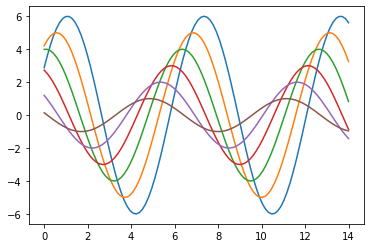

In [2]:
# 绘制多个正弦函数图像
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
        
sinplot()

可以看到上面由matplotlib绘制的图像背景单一，不太美观。我们可以使用seaborn提供的`set()`函数来定制我们图像的样式：

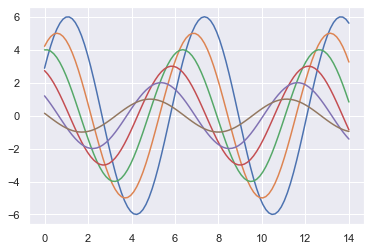

In [5]:
sns.set()
sinplot()

> 需要注意，在seaborn的0.8版本之前，在导入`seaborn`时会自动调用set()，而在以后的版本中，必须显式地调用它。

seaborn将matplotlib中控制样式的参数分为了两组，一组来控制图像的美学风格，另一组用来控制图像中不同元素的缩放 （例如控制线条粗细）。

为了控制着两组参数，seaborn分别提供了两组函数来控制：为了控制图像风格，可以使用`axes_style()`和`set_style()`函数。为了缩放图像，可以使用`plotting_context()`和`set_conetext()`函数。

每组函数中的第一个函数会返回参数字典，而第二个函数为设置matplotlib图像的默认值。

----


## 图像风格改造

seaborn目前有五种预置的图像主题：`darkgrid`,`whitegrid`,`dark`,`white`和`ticks`，默认主题为`darkgrid`。

`grid`类型的主题通过添加背景网格，以方便观察图像中的定量信息。而`white`类型主题可以隐藏网格，使得绘制数据分布或回归关系等时更加直观。而`whitegrid`更加适合绘制有大量数据元素的图像。

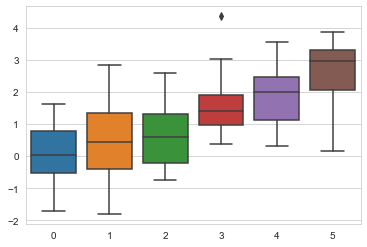

In [5]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

上图中，我们绘制了具有六个类别元素的数据图像，而`whitegrid`正是适合这种类型的数据。

对于之前绘制的正弦函数图像，我们也可以去除网格观察：

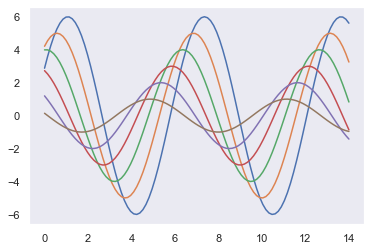

In [7]:
sns.set_style('dark')
sinplot()

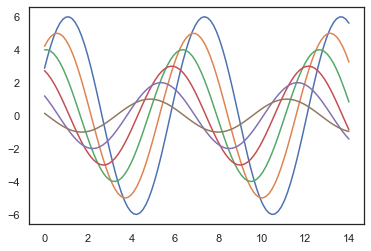

In [8]:
sns.set_style('white')
sinplot()

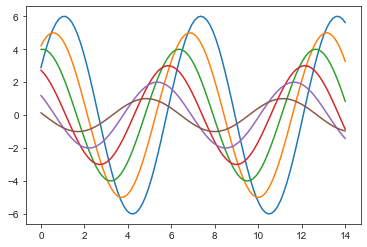

In [7]:
sns.set_style('ticks')
sinplot()

----

## 移除轴线


在`white`和`ticks`样式中，都会在图像的上方和右侧添加轴线，绘制一个封闭的图像。秉着这两种样式的简洁风格，我们可以将这两个轴线移除：

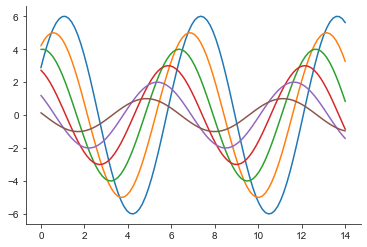

In [8]:
sinplot()
sns.despine()

除了移除多余轴线外，`despine()`函数还可以`offset`参数设置轴线之间的偏置距离，`trim`参数可以控制余下轴线的范围 (将x,y的范围设为闭和区间）：

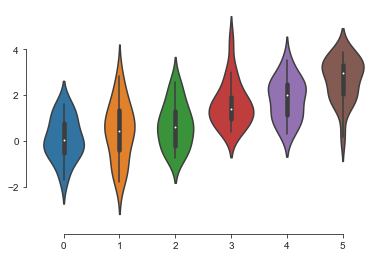

In [14]:
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

我们也可以控制移除哪些轴：

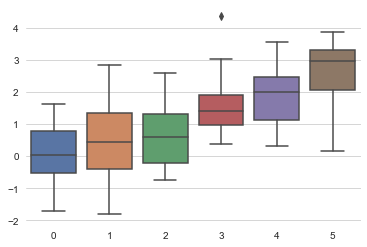

In [18]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True, bottom=True);

---

## 使用“一次性”样式

通过`with`上下文管理器，我们可在其内部定义暂时性的样式，这样可以绘制多种不同的样式图像：

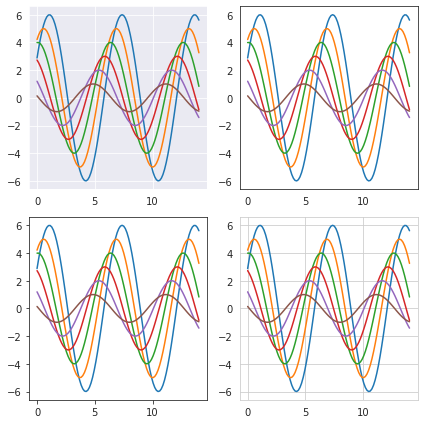

In [4]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)  # 添加网格

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()

f.tight_layout()

---

## 自定义seaborn样式

如果想要自定义seaborn的风格，我们可以向`axes_style()`和`set_style()`函数的`rc`参数传入一个样式参数字典。

> 这种方法允许我们修改部分样式参数，如果想修改完整的matplotlib图像样式参数，可以使用更高层的`set()`函数。

想查看当前有哪些可以修改的样式参数，可以使用如下命令：

In [6]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

`axes_style()`不传入参数时，会返回当前可修改的参数字典。

借助上述信息，我们可以轻松修改参数：

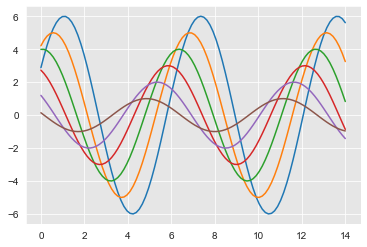

In [7]:
sns.set_style('darkgrid', rc={"axes.facecolor": '0.9'})
sinplot()

---

## 缩放图像元素

seaborn提供了一组单独的参数用来控制图像元素的比例，使得我们图像能够适应背景。

为了重置默认的参数，可以直接使用`set()`方法：

In [8]:
sns.set()

有四组预置：`paper`、`notebook`、`talk`、`poster`。`notebook`样式是默认的，我们也可以修改默认：

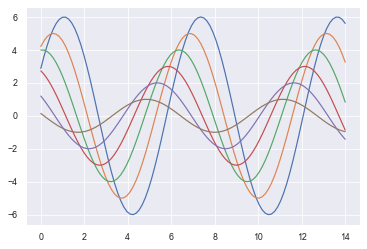

In [9]:
sns.set_context("paper")
sinplot()

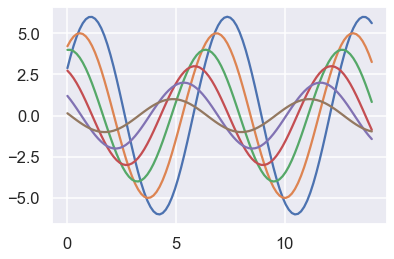

In [10]:
sns.set_context("talk")
sinplot()

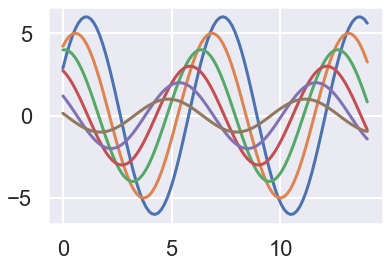

In [11]:
sns.set_context("poster")
sinplot()

为了控制样式，我们可以使用`set_context()`函数，传入单独的样式参数，或者也可以同时传入参数字典`rc`：

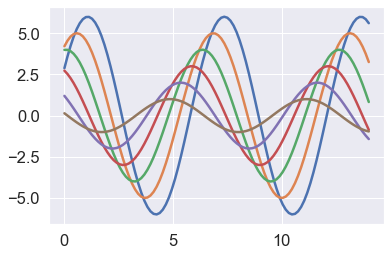

In [12]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

同样地，我们也可以使用`with`语句来使用一次性缩放样式。

风格`style`和图像语境`context`都可以使用`set()`函数快速进行配置。